# Introduction à la Science des données


## Travail pratique 06 - EDA, Clustering et apprentissage non-supervisé

**Professeurs**: Carlos Peña et Stephan Robert

**Assistant(s)**: Thibault Schowing, Xavier Brochet

**Emails**: quentin.surdez@heig-vd.ch

### Date: 

- 17-19 janvier 2023

### Modalités

- Travail **individuel**. 

- Ordinateur et cours autorisé

- Utilisez ce notebook ainsi que votre cours pour répondre aux questions.

- Vous pouvez modifier / ajouter / supprimer ce que vous voulez dans ce notebook, il n'est pas à rendre.

- Le notebook est volontairement dépourvu au maximum de texte. C'est à vous de comprendre le code !


### Note 

- Ce TP est noté sur 6, pour un poids de 10%



## TP6 - Partie 1

Vous pouvez trouver les graphiques principaux sur [cette page](https://www.kaggle.com/code/kushal1996/customer-segmentation-k-means-analysis). Le plot 3D se trouve tout en bas et est interactif. 

## TP6 - Partie 2

Clustering d'image de couleur


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as image
from skimage import io
from sklearn.cluster import KMeans

(400, 650, 3)


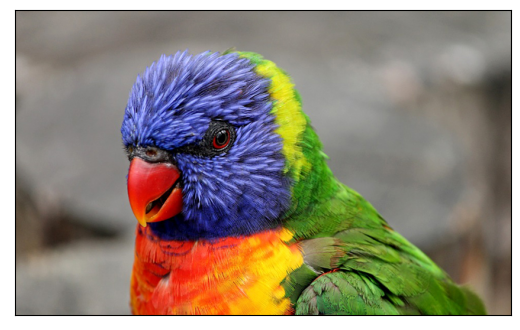

In [3]:
# Lire l'image
#img  = io.imread('./imgs/parrot-3017449_640.jpg') 
img  = io.imread('https://lemagdesanimaux.ouest-france.fr/images/dossiers/2020-04/lori-1-134153.jpg')
print(img.shape)
img = img[:,:,:3] # On a  besoin que de 3 canaux (RGB). Nécessaire si l'image a 4 canaux
ax = plt.axes(xticks=[],yticks=[])
ax.imshow(img)

In [4]:
img.shape

(400, 650, 3)

In [5]:
img_data = (img / 255.).reshape(-1, 3) # Valeurs entre 0 et 1
img_data.shape # On a une liste, composée de listes de 3 valeurs


(260000, 3)

### Plot 3D


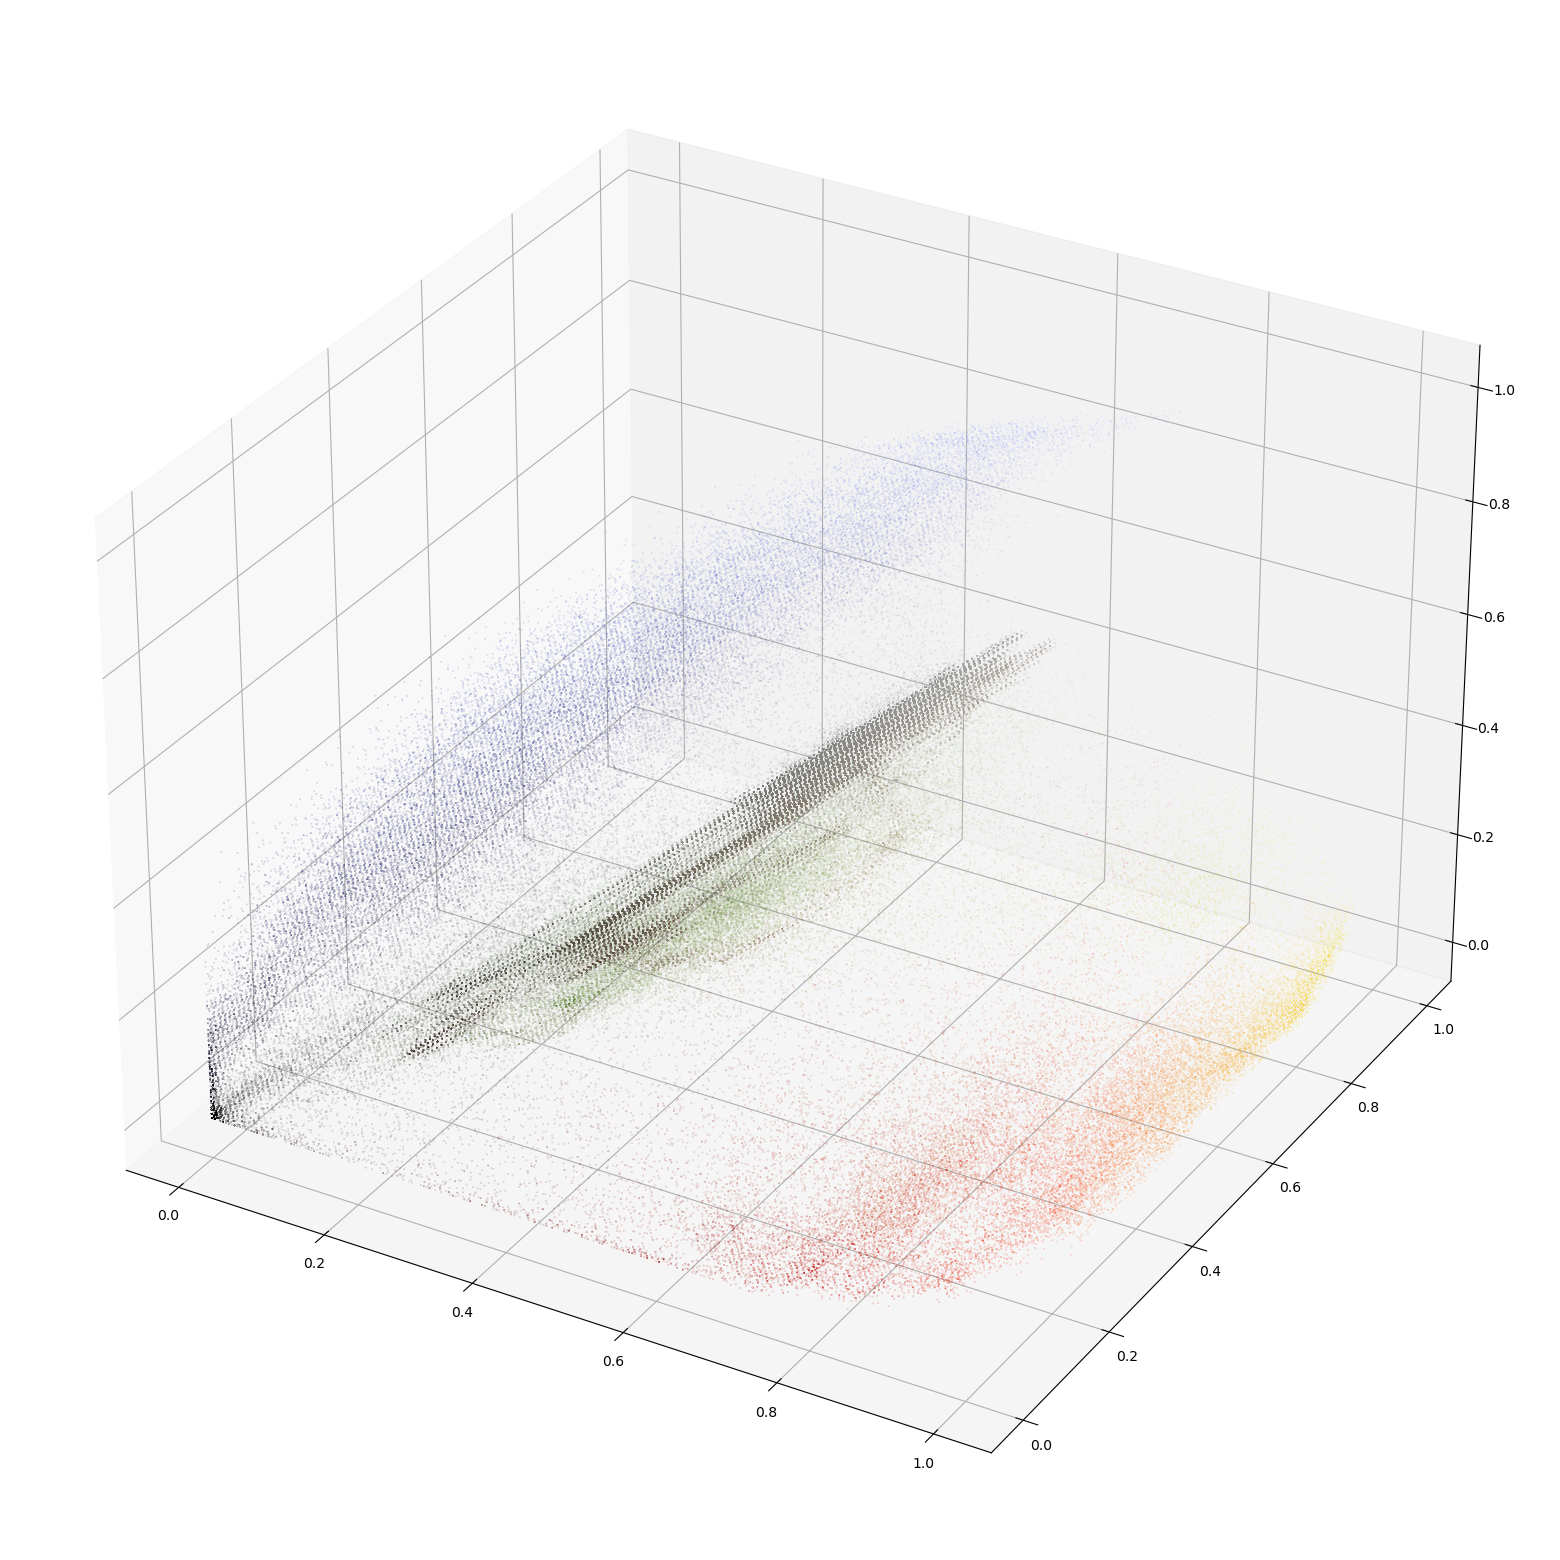

In [6]:
fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(projection='3d')
ax.scatter(img_data[:,0], img_data[:,1], img_data[:,2], c=img_data, s=0.01)

## Plot 2D

In [7]:
# Simplement utilisé pour afficher les données joliment. 
class plot_utils:
    def __init__(self, img_data, title, num_pixels=10000, colors=None):
        self.img_data = img_data
        self.title = title
        self.num_pixels = num_pixels
        self.colors = colors

    def colorSpace(self):
        if self.colors is None:
            self.colors = self.img_data

        rand = np.random.RandomState(42)
        index = rand.permutation(self.img_data.shape[0])[:self.num_pixels]
        colors = self.colors[index]
        R, G, B = self.img_data[index].T
        fig, ax = plt.subplots(1, 2, figsize=(12,8))
        ax[0].scatter(R, G, color=colors, marker='.')
        ax[0].set(xlabel='Red', ylabel='Green', xlim=(0, 1), ylim=(0, 1))
        ax[1].scatter(R, B, color=colors, marker='.')
        ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 1), ylim=(0, 1))
        fig.suptitle(self.title, size=20)

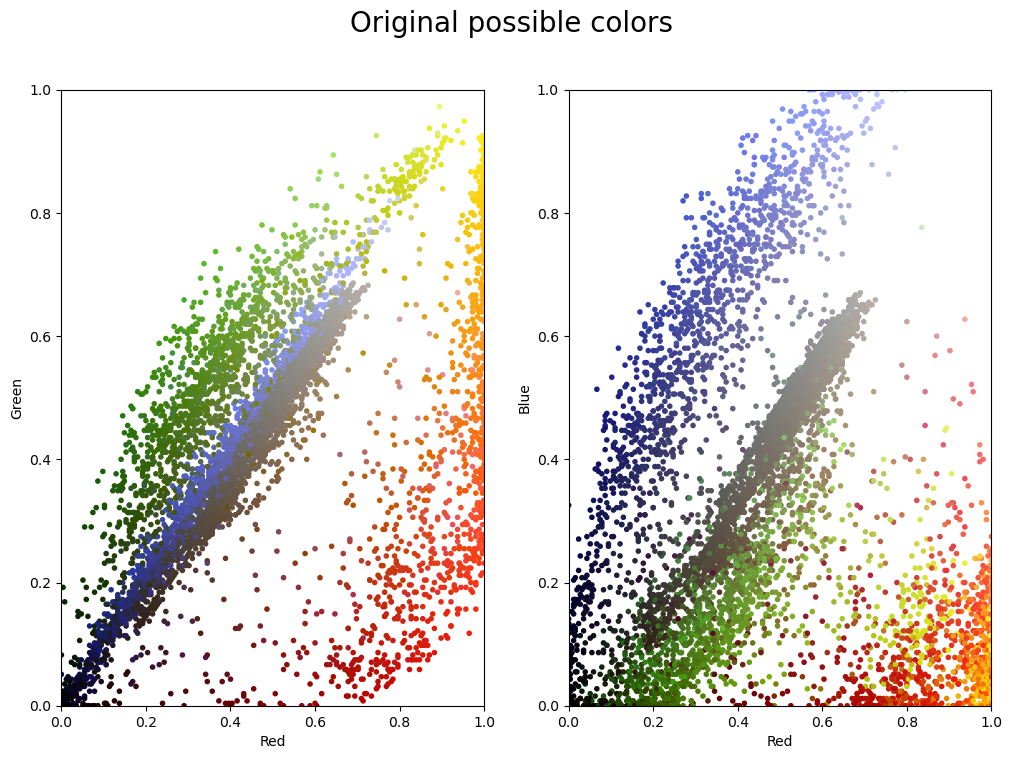

In [8]:
color = plot_utils(img_data, title='Original possible colors')
color.colorSpace()

### Inertie et méthode du coude



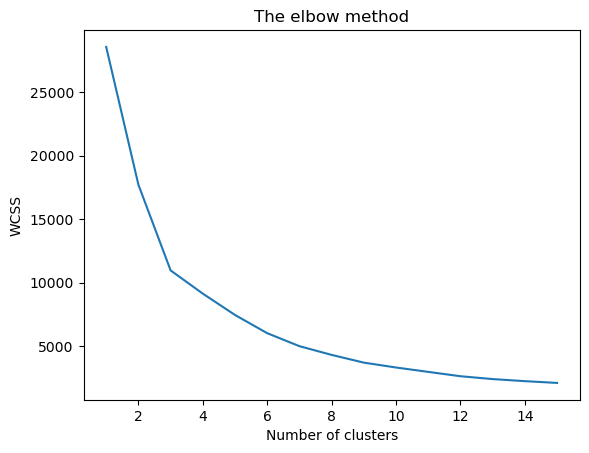

In [9]:
wcss = []

for i in range(1, 16):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(img_data)
    wcss.append(kmeans.inertia_)
    
# Plotting the results onto a line graph, 
# `allowing us to observe 'The elbow'
plt.plot(range(1, 16), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # Within cluster sum of squares
plt.show()

In [31]:

K = 3
kmeans = KMeans(n_clusters=K).fit(img_data)


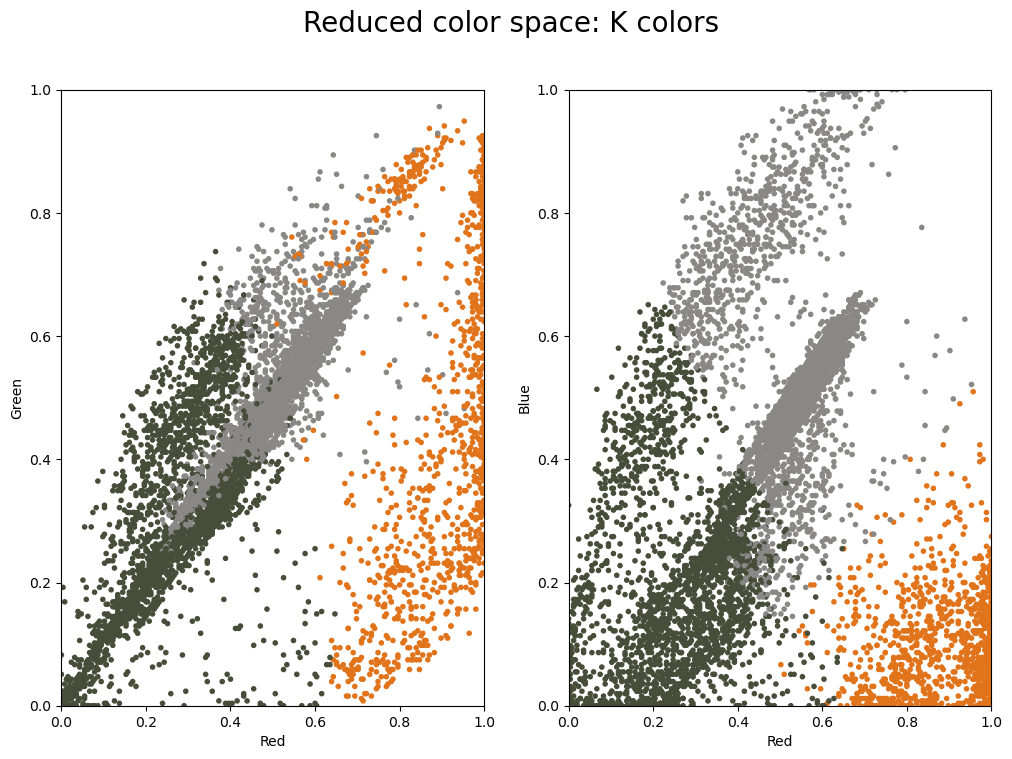

In [32]:
k_colors = kmeans.cluster_centers_[kmeans.predict(img_data)] #here we are predicting K colors on the img 

y = plot_utils(img_data, colors=k_colors, title="Reduced color space: K colors")
y.colorSpace()

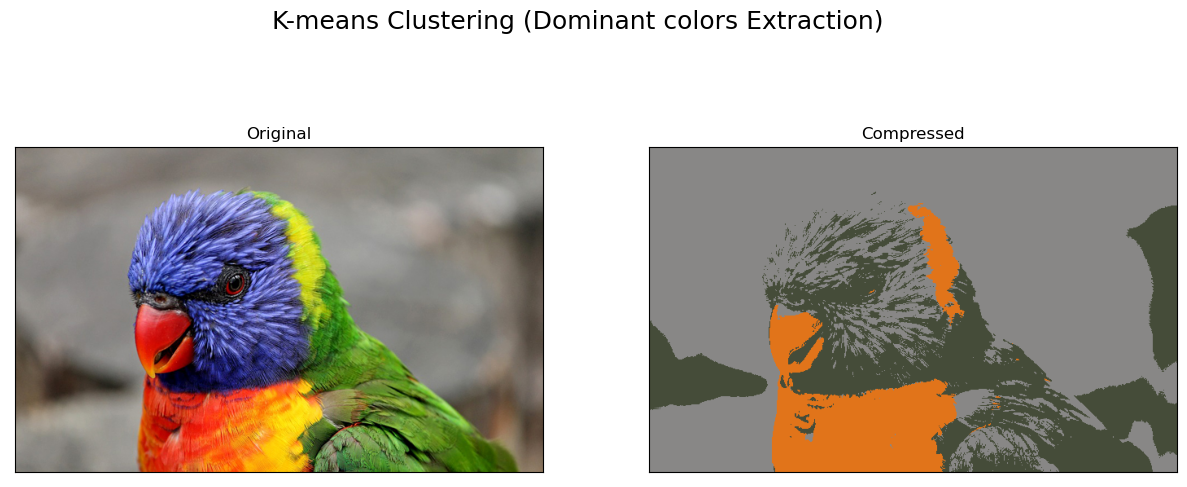

In [33]:
k_img = np.reshape(k_colors, (img.shape))
    
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(15,6))#this show 1 row but 2 col means one row has 2 images
fig.suptitle('K-means Clustering (Dominant colors Extraction)', fontsize=18)

ax1.set_title('Original')
ax1.set_xticks([])
ax1.set_yticks([])
ax1.imshow(img)

ax2.set_title('Compressed')
ax2.set_xticks([])
ax2.set_yticks([])
ax2.imshow(k_img)

plt.subplots_adjust(top=0.85)
plt.show()

In [36]:
n = 3
print([i**2 for i in range(1, n+1)])

[1, 4, 9]
